# Problem Set 3

## Directions

1. Show all work/steps/calculations using a combination of code and Markdown.
2. **All** work is to be your own. This is not a group project. You may, however, use code from the lectures and labs. Provide citations for any code that is not your own. You may also consult Stackoverflow, etc. This is not by any means "closed book" or anything like that. Basically, I need to see if *you* learned the concepts from the Lectures, *Fundamentals*, and Labs.
3. Add whatever markdown or code cells you need in each part to explain and calculate your answers. Don't just provide answers but explain them as well. **Explain and interpret your results.**

**Submission**

For this assignment...

0. Complete the pre-submission checklist at the end of the notebook.
1. Name the notebook to be your JHED ID, ie, `ssmith1.ipynb`. Do not add anything else to the name.
2. Upload to Canvas.

Do not add anything to the names like " Problem Set 2".
Any assignment not following the submission guidelines will generally be assumed to be incomplete under the Syllabus and therefore a "C".
Do not return the data set.
Do not return the eda.py file.


<div style="background: lemonchiffon; margin:20px; padding: 20px;">
    <strong>Note</strong>
    <p>This Problem Set covers Labs 5 and 6 (and the corresponding course materials). However, principles covered in previous modules are still relevant (visualization, probability, etc.).</p>
    <p>Additionally, this is a <em>report</em>, a narrative description of your process and findings. Use full sentences. Limit bullet lists. You should be able to "hide code" and have the remaining text make sense.</p></div>


This is a problem about Abalone. Do you lack domain knowledge? **Google it**. Some common knowledge about volumes and weight will also help.

For the purposes of this assignment, assume that the overall question revolves around abalone rings. The target variable is rings because it is a predictor of age. This assignment is thus not a complete answer to the question but the first steps. Although you must follow the visualization guidelines from Module 4, the source material for this assignment comes from Modules 5 and 6 *only*. No linear regression. No Naive Bayes.

Of necessity, there is very little ETL here except to verify that the data has loaded correctly and with the correct types. For the EDA and Modeling parts, follow the guidelines in *Fundamentals*. single value models (mean) or mathematical distributions.

<a id="contents"></a>
# Contents

1. [ETL](#step1)
2. [EDA](#step2)
3. [Statistical and Mathematical Modeling of the Target Variable](#step3)


In [2]:
%matplotlib inline

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

C:\Users\Jhirs\AppData\Local\Temp\ipykernel_23212\1732654708.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 1 <a id="step1">(ETL) Extract, Transform, Load the Data</a>
<a href="#contents">^ Contents</a>

This is the data dictionary for the Abalone data:

```
Description of fields in abalone data.

Name            Data Type    Meas.    Description
----            ---------    -----    -----------
Sex             nominal               M, F, and I (infant)
Length          continuous    mm      Longest shell measurement
Diameter        continuous    mm      perpendicular to length
Height          continuous    mm      with meat in shell
Whole weight    continuous    grams   whole abalone
Shucked weight  continuous    grams   weight of meat
Viscera weight  continuous    grams   gut weight (after bleeding)
Shell weight    continuous    grams   after being dried
Rings           integer               +1.5 gives the age in years
```

The first step is to load the data from its remote location into a dataframe and make sure you have the data:

In [2]:

df = pd.read_csv("https://raw.githubusercontent.com/fundamentals-of-data-science/datasets/master/abalone.original.csv")

First we can start by making sure we read in the data properly.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4176 entries, 0 to 4175
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M       4176 non-null   object 
 1   91      4176 non-null   int64  
 2   73      4176 non-null   int64  
 3   19      4176 non-null   int64  
 4   102.8   4176 non-null   float64
 5   44.9    4176 non-null   float64
 6   20.2    4176 non-null   float64
 7   30      4176 non-null   float64
 8   15      4176 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 293.8+ KB


There are 4176 observations, and it doesn't look like we have any missing values. It does appear the columns are not labelled correctly however. The datatype for most features is an integer or float (with the exception of sex), which matches the descriptions from the markdown above. 

Let's look at the first 5 rows to get an idea of how an observations looks.

In [4]:
df.head()

,M,91,73,19,102.8,44.9,20.2,30,15
0,M,70,53,18,45.1,19.9,9.7,14.0,7
1,F,106,84,27,135.4,51.3,28.3,42.0,9
2,M,88,73,25,103.2,43.1,22.8,31.0,10
3,I,66,51,16,41.0,17.9,7.9,11.0,7
4,I,85,60,19,70.3,28.2,15.5,24.0,8


Hmm, we can see here our suspicions were right - the headers for each column should actually be its own observation. From my domain knowledge (looking up this dataset on Kaggle), I know that there should be 4177 observations/rows, yet we only saw there were 4176 entries from the above call to info().

Let's try reading in the data again with headers:

In [4]:
names = ['Sex', 'Length (mm)', 'Diameter (mm)', 'Height (mm)', 'Whole Weight (g)',
                'Shucked Weight (g)', 'Viscera Weight (g)', 'Shell Weight (g)', 'Rings']
df = pd.read_csv("https://raw.githubusercontent.com/fundamentals-of-data-science/datasets/master/abalone.original.csv", names=names)

Again we can start with looking at the info in the dataframe.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Sex                 4177 non-null   object 
 1   Length (mm)         4177 non-null   int64  
 2   Diameter (mm)       4177 non-null   int64  
 3   Height (mm)         4177 non-null   int64  
 4   Whole Weight (g)    4177 non-null   float64
 5   Shucked Weight (g)  4177 non-null   float64
 6   Viscera Weight (g)  4177 non-null   float64
 7   Shell Weight (g)    4177 non-null   float64
 8   Rings               4177 non-null   int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 293.8+ KB


Now we can see we have 4177 entries, which should be the correct number. The columns are labeled more appropriately, and we can check the first 5 rows once again:

In [9]:
df.head()

,Sex,Length (mm),Diameter (mm),Height (mm),Whole Weight (g),Shucked Weight (g),Viscera Weight (g),Shell Weight (g),Rings
0,M,91,73,19,102.8,44.9,20.2,30.0,15
1,M,70,53,18,45.1,19.9,9.7,14.0,7
2,F,106,84,27,135.4,51.3,28.3,42.0,9
3,M,88,73,25,103.2,43.1,22.8,31.0,10
4,I,66,51,16,41.0,17.9,7.9,11.0,7


This looks much better as we are now including that first 'header' observation at the 0th indexed row, and the columns are easier to read with these labels. We note most features are only counted to 0 or 1 decimal place. We can now start performing single variable EDA.

## 2 <a id="step2">(EDA) Exploratory Data Analysis</a>
<a href="#contents">^ Contents</a>

## Single Variable EDA

<a id="contents"></a>

* [Sex](#sex)
* [Length](#length)
* [Diameter](#diameter)
* [Height](#height)
* [Whole Weight](#whole_weight)
* [Shucked Weight](#shucked_weight)
* [Viscera Weight](#viscera_weight)
* [Shell Weight](#shell_weight)
* [Rings](#rings)



## Pairwise EDA

<a id="contents"></a>

* [Sex vs Rings](#sex_rings)
* [Length vs Rings](#length_rings)
* [Diameter vs Rings](#diameter_rings)
* [Height vs Rings](#height_rings)
* [Whole Weight vs Rings](#whole_weight_rings)
* [Shucked Weight vs Rings](#shucked_weight_rings)
* [Viscera Weight vs Rings](#viscera_weight_rings)
* [Shell Weight vs Rings](#shell_weight_rings)

Note before I begin that I am copying several functions from the eda.py file/Lab 5 - Solution.ipynb to make EDA easier (freeman_diaconis, histogram_w_whiskers, histogram_trio).

In [13]:
def freeman_diaconis(data):
    quartiles = stats.mstats.mquantiles( data, [0.25, 0.5, 0.75])
    iqr = quartiles[2] - quartiles[ 0]
    n = len( data)
    h = 2.0 * (iqr/n**(1.0/3.0))
    return int( h)

In [14]:
def histogram_w_whiskers(data, variable_name, zoom=None):
    h = freeman_diaconis(data[variable_name])
    mn = int(data[variable_name].min())
    mx = int(data[variable_name].max())
    bins = [i for i in range( mn, mx, h)]
    print(f"Freeman Diaconis for {variable_name}: {len(bins)} bins")

    observations = len(data)
    empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()
        
    # start the plot: 2 rows, because we want the boxplot on the first row
    # and the hist on the second
    fig, ax = plt.subplots(
        2, figsize=(7, 5), sharex=True,
        gridspec_kw={"height_ratios": (.7, .3)}  # the boxplot gets 30% of the vertical space
    )

    # the histogram
    ax[0].hist(data[variable_name],bins=bins, color="dimgray", weights=empirical_weights)
    ax[0].set_title(f"{variable_name} distribution - Freeman Diaconis")
    ax[0].set_ylabel("Relative Frequency")
    if zoom:
        ax[0].set_ylim((0, zoom))
    # the box plot
    ax[1].boxplot(data[variable_name], vert=False)
    # removing borders
    ax[1].spines['top'].set_visible(False)
    ax[1].spines['right'].set_visible(False)
    ax[1].spines['left'].set_visible(False)
    ax[1].set_xlabel(variable_name)

    # and we are good to go
    plt.show()
    plt.close()
    return h

In [15]:
def histogram_trio(data, variable_name, zoom=1.0):
    h = freeman_diaconis(data[variable_name])
    mn = int(data[variable_name].min())
    mx = int(data[variable_name].max())
    bins = [i for i in range( mn, mx, h)]
    print(f"Freeman Diaconis for {variable_name}: {len(bins)} bins")

    observations = len(data)
    empirical_weights = np.ones(observations)/observations # this converts counts to relative frequencies when used in hist()

    fig, ax = plt.subplots(1, 3, figsize=(20, 6), sharey=True)

    fewer_bins = int(len(bins) * .50)
    more_bins = int(len(bins) * 2)

    n, bins, patches = ax[1].hist(data[variable_name], color="DimGray", bins=bins, weights=empirical_weights) # <---
    ax[1].set_xlabel(variable_name)
    ax[1].set_ylabel("Relative Frequency")
    ax[1].set_title(f"Relative Frequency Histogram of {variable_name}")
    ax[1].set_ylim((0, zoom))
    
    n, bins, patches = ax[0].hist(data[variable_name], color="DimGray", bins=fewer_bins, weights=empirical_weights)
    ax[0].set_xlabel(variable_name)
    ax[0].set_ylabel("Relative Frequency")
    ax[0].set_title(f"Relative Frequency Histogram of {variable_name} (Fewer Bins)")
    
    n, bins, patches = ax[2].hist(data[variable_name], color="DimGray", bins=more_bins, weights=empirical_weights)
    ax[2].set_xlabel(variable_name)
    ax[2].set_ylabel("Relative Frequency")
    ax[2].set_title(f"Relative Frequency Histogram of {variable_name} (More Bins)")

    plt.show()
    plt.close()

### <a id="sex">Sex</a> <br>
<a href='#step2'> ^ EDA </a>

Let's go in order each variable appears in the dataframe, even though we are mostly interested in Age (more on that later). Sex is the only categorical variable, and it has only 3 values: Male (M), Female (F), and Infant (I). Infant means the abalone is traditionally too young to be harvested - in order to sustain the abalone population. We can see how many of each value are present in the dataset:

In [16]:
df['Sex'].value_counts()

Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64

A slightly higher count of males than infants or females, but not by too much. Infants and females are seen in about equal proportions. We would expect the ages of abalone listed as infants to be younger than their counterparts, which we will look at during our pairwise EDA between Sex and Age.

We can create a simple vertical bar chart in order to visualize the values of the sex as a frequency, although I don't think it will show us too much that we couldn't see strictly from the counts of each value.

['M', 'I', 'F']


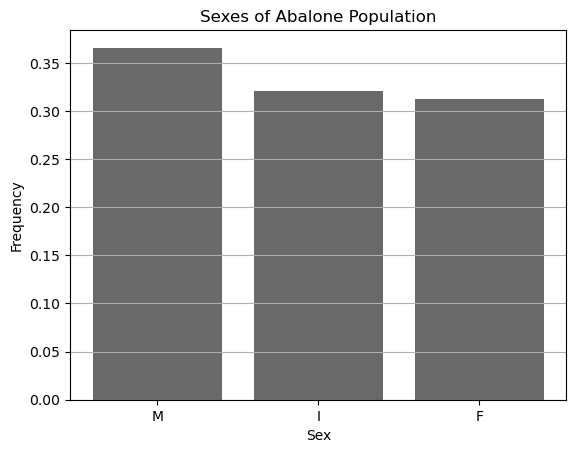

In [43]:
sexes = sorted(df['Sex'].unique())[::-1]
counts = df['Sex'].value_counts(normalize=True).sort_values(ascending=False)

plt.bar(sexes, counts, color='dimgray')
plt.title('Sexes of Abalone Population')
plt.xlabel('Sex')
plt.ylabel('Frequency')

plt.grid(axis='y')

Again I don't think there's anything too surprising here - the chart matches our conclusion that each value for sex is fairly close to one another, with males being slightly higher. I couldn't find any consensus as to whether males live longer than females or vice versa. It will be more interesting to look at whether sex affects age.

### <a id="length">Length</a> <br>
<a href='#step2'> ^ EDA </a>

Next let's look at length. This is a numeric variable, and is listed in millimeters (mm). We can describe the length with some summary statistics:

In [44]:
df['Length (mm)'].describe()

count    4177.000000
mean      104.798420
std        24.018583
min        15.000000
25%        90.000000
50%       109.000000
75%       123.000000
max       163.000000
Name: Length (mm), dtype: float64

Again no missing values present here (for all intents and purposes I will not mention missing values going forward, since we saw from our call to info() we do not have any missing values in any variable). We can see the mean length of 105mm, and a standard deviation of 24mm. Our median is 109mm, so we should expect a somewhat symmetric distribution here. Both the 1st quartile and 3rd quartile seem about the same distance from the median. Let's look at a histogram and boxplot first:

Freeman Diaconis for Length (mm): 37 bins


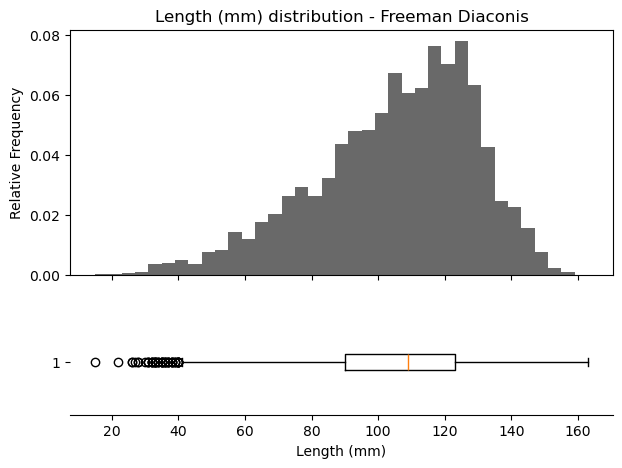

4

In [45]:
histogram_w_whiskers(df, 'Length (mm)')

We actually see a lot of values on the shorter end around 25mm-40mm, roughly. The distribution appears somewhat symmetric, with perhaps a slight left skew. 

We would expect younger abalone to be shorter/smaller than adults, and it would seem that females tend to also be shorter/smaller than males. Remember that we had a fairly even ratio between all 3 values of sex, so taking into account that both females and infants outnumber males, this distribution makes sense tending towards the shorter lengths.

We can also look at a trio of histograms to see if any patterns emerge from changing the bin size of the histogram:

Freeman Diaconis for Length (mm): 37 bins


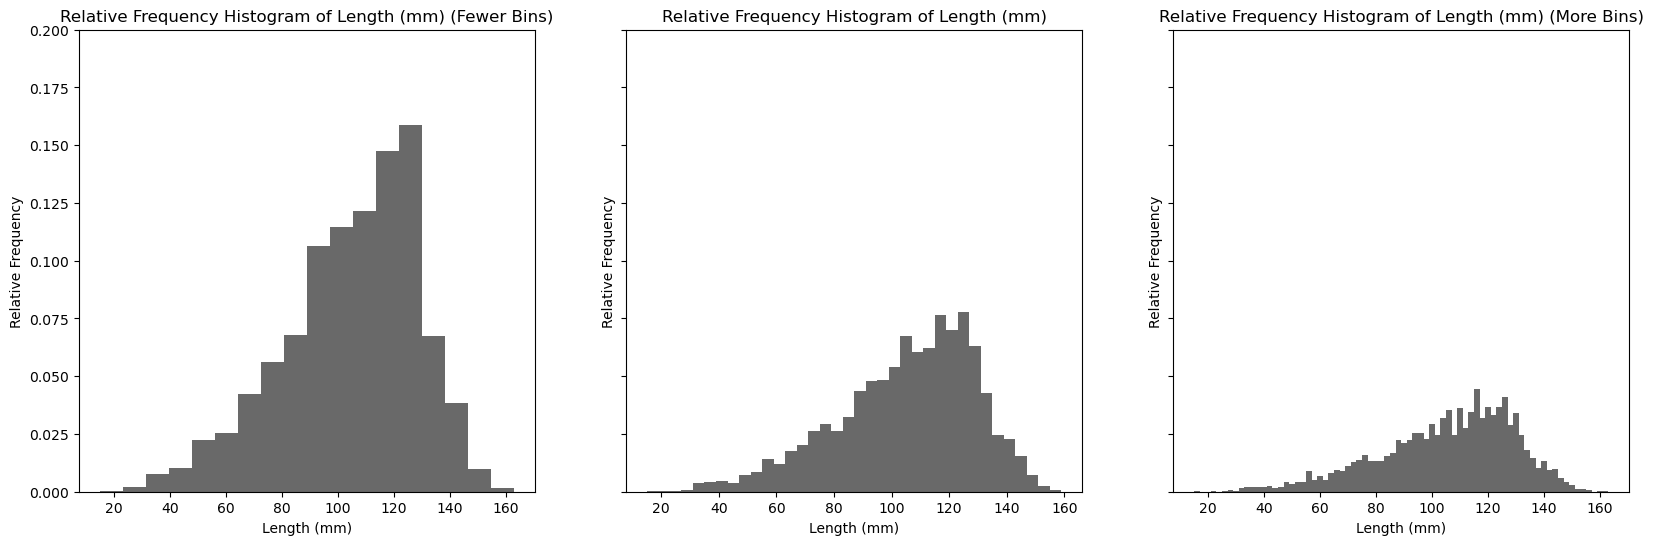

In [53]:
histogram_trio(df, 'Length (mm)', zoom=0.20)

One thing to note is that there appears to be a drop off in the frequency of length after about 130mm. This is a question to ask going forward - why this drop off? It would be interesting to look at how Length compares to Age or even Sex.

We expect older abalone to have larger/longer shells than infants, and may also expect males to be larger than females.

### <a id="diameter">Diameter (mm)</a> <br>
<a href='#step2'> ^ EDA </a>

Now we can look at Diameter in millimeters. This is another numeric variable, and like Length is also continuous. We can start with the summary statistics:

In [47]:
df['Diameter (mm)'].describe()

count    4177.000000
mean       81.576251
std        19.847973
min        11.000000
25%        70.000000
50%        85.000000
75%        96.000000
max       130.000000
Name: Diameter (mm), dtype: float64

We see a mean of about 82, and a standard deviation of about 20. Our median is 85, not too far off from the mean, so once again we should expect a symmetric distribution for Diameter. Again, the 1st and 3rd quartiles are about equidistant from the mean and median. Considering Diameter is simply perpendicular to Length, we would expect these 2 variables to be related.

Now let's look at another histogram and boxplot:

Freeman Diaconis for Diameter (mm): 40 bins


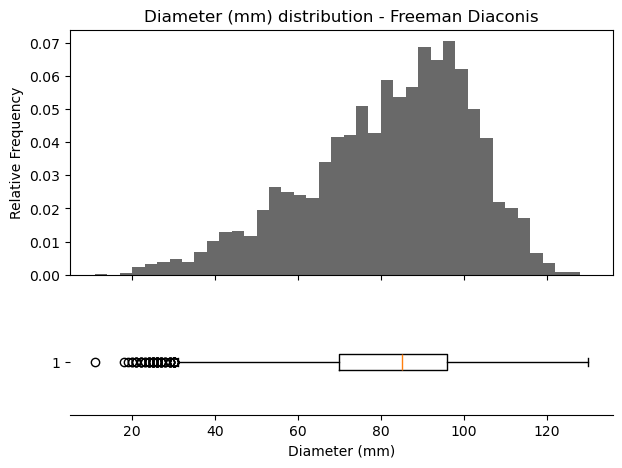

3

In [48]:
histogram_w_whiskers(df, 'Diameter (mm)')

Our findings are quite similar to Length indeed. We see a lot of values closer to the minimum rather than the maximum, and the distrbution, though somewhat symmetric, has a bit of a left skew. Again we expect the reason for lower values is the combination of females and infants being smaller than males.

Let's look at a histogram trio as well:

Freeman Diaconis for Diameter (mm): 40 bins


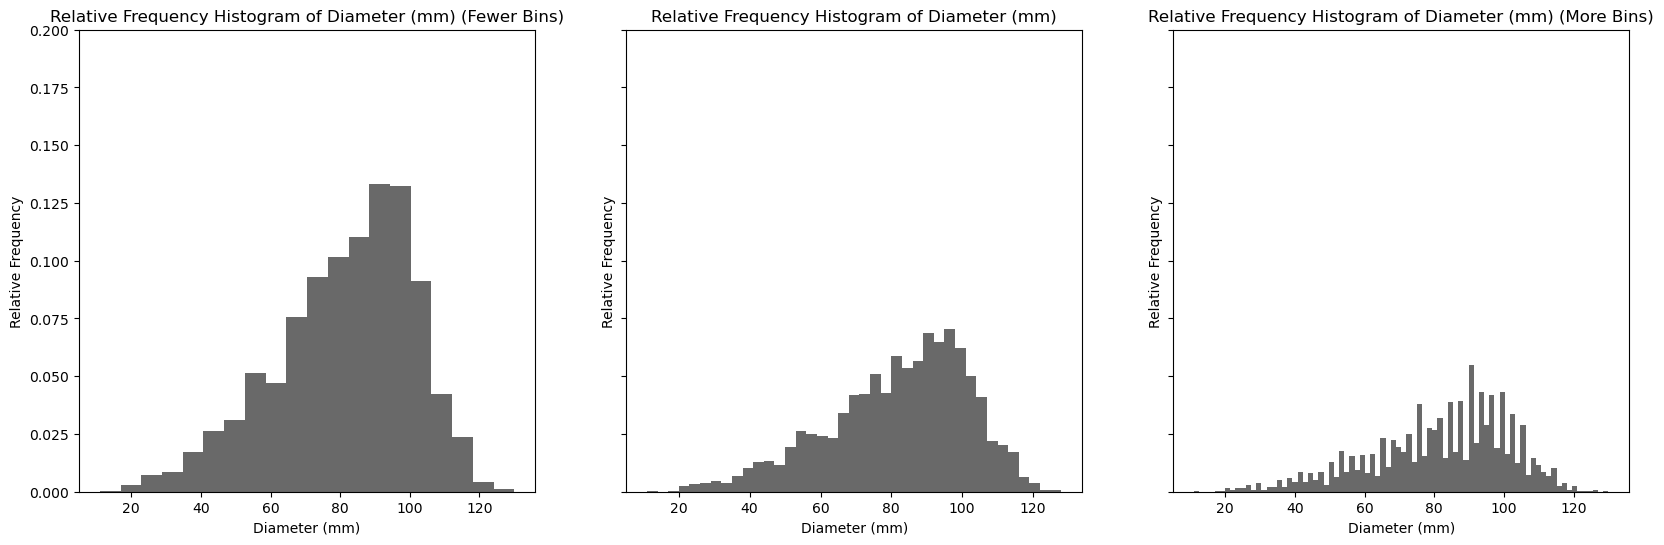

In [52]:
histogram_trio(df, 'Diameter (mm)', zoom=0.20)

Again there seems to be a bit of a dropoff in frequency after about a Diameter of 100mm. The histogram on the right which shows more bins is interesting, as we see more of a 'spiky' pattern come through. I don't think this is indicative of anything too serious however, as this pattern shows up through the entire distribution, not concentrated in just one area.

There may be some evolutionary advantages to having a large diameter, but not so much it hinders an abalone's ability to function. Abalone need to be able to move well in order to catch drifting algae for their diet, so if an abalone gets too big it might not survive as long as slightly smaller abalone.

### <a id="height">Height (mm)</a> <br>
<a href='#step2'> ^ EDA </a>

Next we have Height in millimeters. We expect this variable to be similar and related to Length and Diameter - females and infants will probably skew the data to the left slightly. This is also a numeric variable, so we can look at the descriptive statistics and some histograms/boxplots. We start with descriptive statistics:

In [54]:
df['Height (mm)'].describe()

count    4177.000000
mean       27.903280
std         8.365411
min         0.000000
25%        23.000000
50%        28.000000
75%        33.000000
max       226.000000
Name: Height (mm), dtype: float64

We have a mean of about 28, with standard deviation of about 8. Our median is 28, very similar to the mean, and nothing unusual about the 1st or 3rd quartiles. The max value is unusual however at 226mm. Since the 3rd quartile is only 33mm, we expect this to be a rare case.

Let's look at a histogram/boxplot to check if Height has a similar distribution as Length and Diameter:

Freeman Diaconis for Height (mm): 226 bins


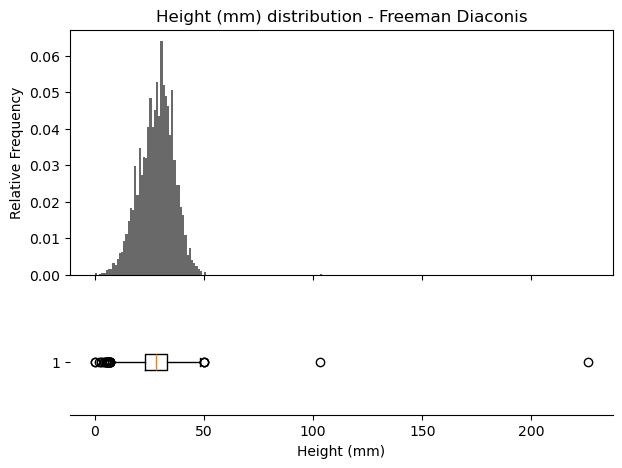

1

In [55]:
histogram_w_whiskers(df, 'Height (mm)')

We see a very symmetric distribution for Height, with a few extreme value at the max of 226mm, around 100mm, and another around 50mm. Though the interquartile range is small, we do see a lot of values on the lower side, similar to Length and Diameter. Again, since we expect these 3 variables to be somewhat proportional to each other (longer abalone properly have larger diameters and are a bit taller), this is fairly consistent with what we know already. 

We look at the trio of histograms once again to see if any unsual patterns show up:

Freeman Diaconis for Height (mm): 226 bins


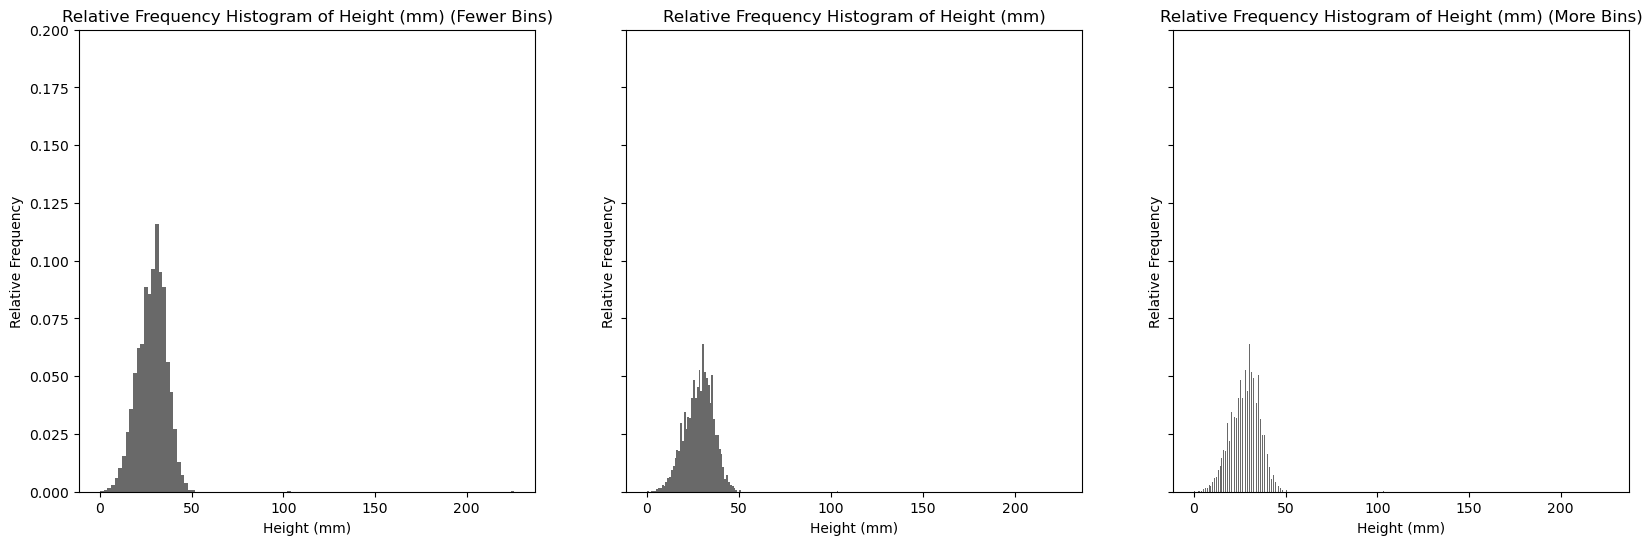

In [60]:
histogram_trio(df, 'Height (mm)', zoom=0.20)

I don't see anything too unsual here - changing the bin size doesn't seem to produce any other results than what we've seen - a fairly symmetric distribution for Height.

To summarize, we might expect abalone that live longer to be larger, and therefore have longer shells, longer diameters, and be taller than younger abalone. Their diets are probably bigger than younger and smaller abalone, so in order to survive they may need to be good scavengers for their diet.

### <a id="whole_weight">Whole Weight (g)</a> <br>
<a href='#step2'> ^ EDA </a>

Now we have Whole Weight in grams. This weight is measured when the abalone is still wet, so we would expect out of all the weights we are looking at in this dataframe, this one should on average be higher than some of the other weights, but we will see later. Once again this is a numeric variable, so we can start with summary statistics:

In [61]:
df['Whole Weight (g)'].describe()

count    4177.000000
mean      165.748432
std        98.077804
min         0.400000
25%        88.300000
50%       159.900000
75%       230.600000
max       565.100000
Name: Whole Weight (g), dtype: float64

We have a mean weight of 165.7g, and a median of 159.9, fairly similar. There is a large range between the max of 565.1g and the min of 0.4g. The 3rd quartile is only 230.6g, so similar to Height, we expect this to be an extreme value. The standard deviation is quite large to note, 98.1g. We should expect a right skew since mean is slightly larger than median.

Again we will use the same 2 charts for this variable as we've been using, a histogram with whiskers and trio of histograms:

Freeman Diaconis for Whole Weight (g): 34 bins


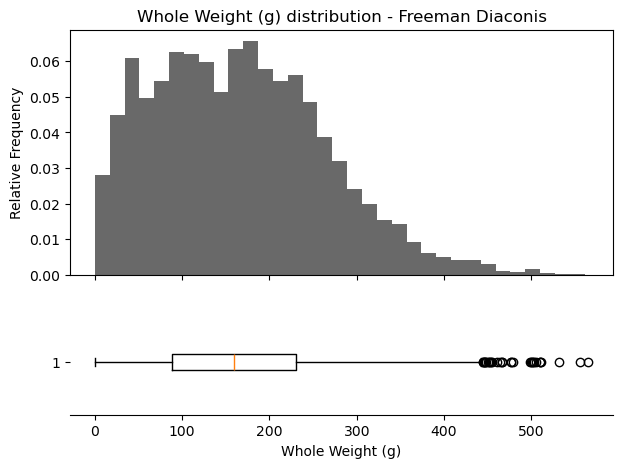

17

In [62]:
histogram_w_whiskers(df, 'Whole Weight (g)')

We do in fact see a fairly symmetric distribution with a bit of a right skew, as expected. To note, there are a lot of large values for Weight here, in the 450g and higher range. I suspect these weights are for some of the larger males with larger/longer shells, whereas the mean/median values might typically be for females, infants, and a good chuck of the males. It would be interesting to look at how Whole Weight and Length are related to one another.

Here we can look at some more histograms, as we've done previously:

Freeman Diaconis for Whole Weight (g): 34 bins


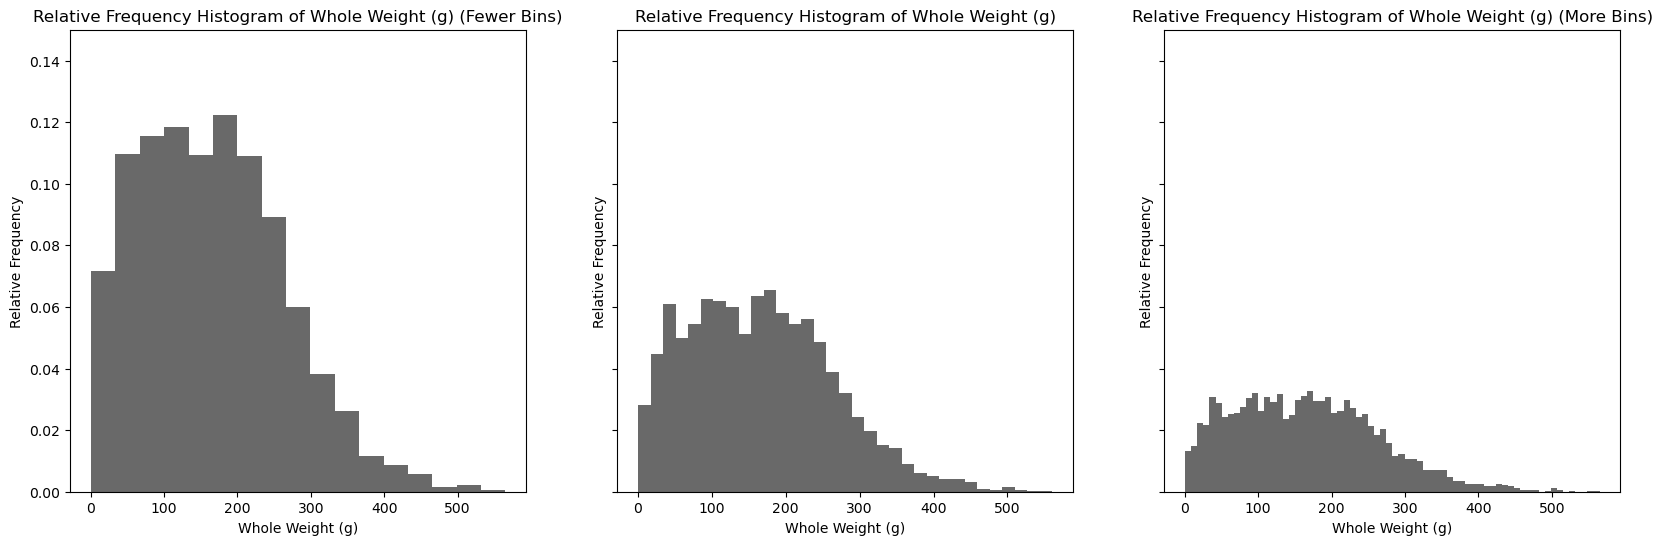

In [64]:
histogram_trio(df, 'Whole Weight (g)', zoom=0.15)

All 3 histograms look similar - there don't seem to be any unsual spikes or patterns otherwise we might see by changing the histogram bin size. We still are seeing a large range of values beween the min of 0.4g and the max of 565.1g.

Live abalone can range from 250g-350g when bred in captivity, which could be a cause of the higher values vs wild abalone. There are different species of abalone, and the smaller ones are probably easier to catch/find in the wild. Selective breeding on abalone farms could limit the size of how big an abalone gets before it is harvested.

### <a id="shucked_weight">Shucked Weight (g)</a> <br>
<a href='#step2'> ^ EDA </a>

Now we can look at Shucked Weight in grams. The Shucked Weight is simply the weight of the abalone without its shell. Needless to say, we expect the Shucked Weight for each abalone to be less than its value for Whole Weight. This is also a numeric variable, so we will look at the descriptive statistics:

In [65]:
df['Shucked Weight (g)'].describe()

count    4177.000000
mean       71.873498
std        44.392590
min         0.200000
25%        37.200000
50%        67.200000
75%       100.400000
max       297.600000
Name: Shucked Weight (g), dtype: float64

Here we have a mean of 71.9g, with a relatively large standard deviation of 44.3g. The min is low at 0.2g while the max is 297.6g - not as large as the range of Whole Weight, but still fairly large nonetheless. The median is 67.2g, so we expect a symmetric distribution since it is close to the mean.

We can look at our traditional histogram with whiskers and trio histograms here:

Freeman Diaconis for Shucked Weight (g): 43 bins


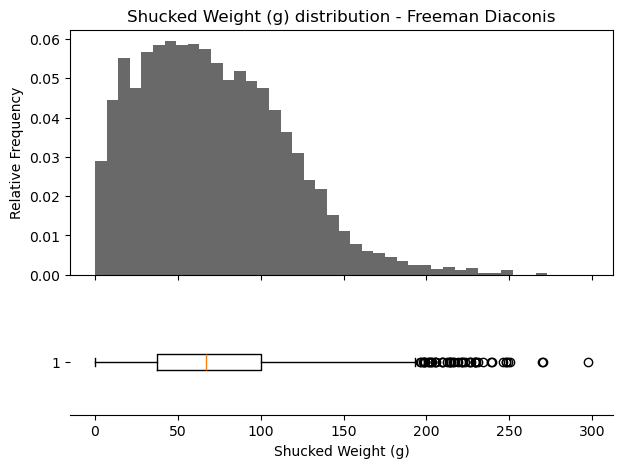

7

In [66]:
histogram_w_whiskers(df, 'Shucked Weight (g)')

Similar to Whole Weight, we see a right skewed distribution, with a lot of values tending on the larger side between 200g-300g. Our 3rd quartile is only 100.4g, so there are not as many abalone larger than this.

Let's see our trio of histograms as well:

Freeman Diaconis for Shucked Weight (g): 43 bins


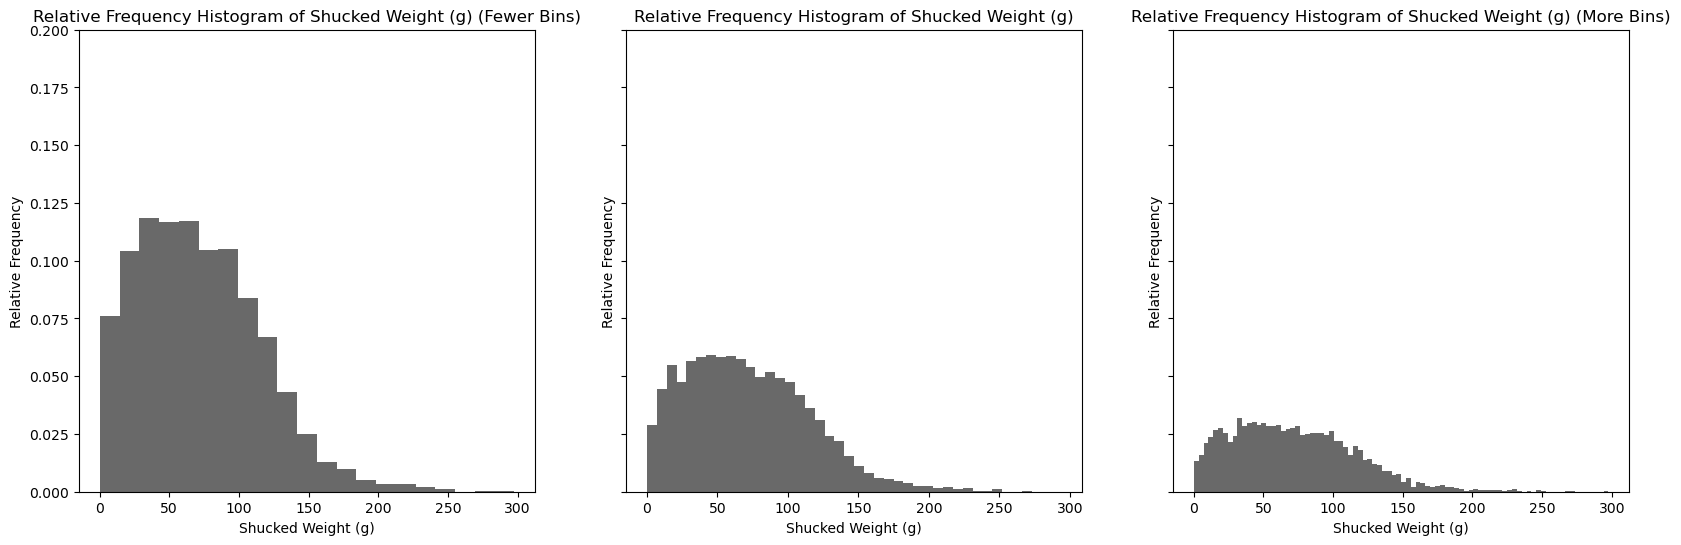

In [68]:
histogram_trio(df, 'Shucked Weight (g)', zoom=0.20)

Nothing unusual here - all 3 histograms look very similar.

If it's true that older abalone are larger, then the Shucked Weight of an abalone might increase as an abalone's age increases. The Shucked Weight is the weight without a shell, so this might be caused due to diet, temperature, and an abalone's general environment.

### <a id="viscera_weight">Viscera Weight (g)</a> <br>
<a href='#step2'> ^ EDA </a>

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC9967480/#:~:text=Abalone%20viscera%2C%20which%20accounts%20for%2015%E2%80%9325%25%20of%20the,pollution%20%5B4%2C5%5D.

Next up is Viscera Weight in grams. According to the National Institutes of Health, viscera weight of an abalone consists of about 15-25% of its total weight. Since this is numeric, we will start once again with summary statistics:

In [69]:
df['Viscera Weight (g)'].describe()

count    4177.000000
mean       36.118722
std        21.922850
min         0.100000
25%        18.700000
50%        34.200000
75%        50.600000
max       152.000000
Name: Viscera Weight (g), dtype: float64

We see a large range between the max of 152.0g and the min of 0.1g, similar to the other weight variables. The mean is 36.1g, while the median slightly lower at 34.2g. Again the standard deviation is relative large at 21.9, almost as much as the mean. For our histogram, we should expect a symmetric distribution with perhaps a slight right skew since mean > median.

Here we have the histogram with whiskers plot:

Freeman Diaconis for Viscera Weight (g): 51 bins


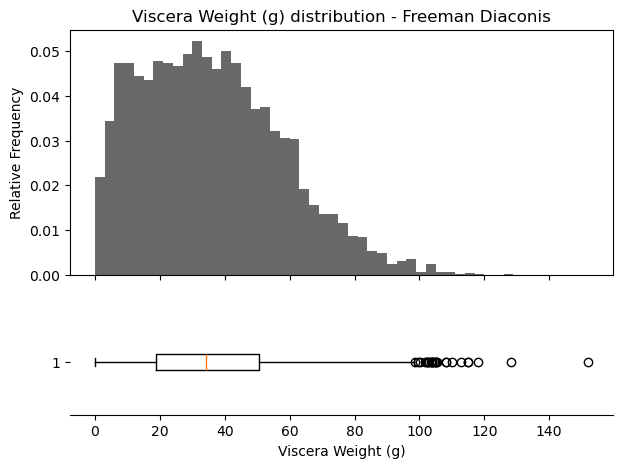

3

In [70]:
histogram_w_whiskers(df, 'Viscera Weight (g)')

About what we expect, right skewed but symmetric distribution. Similar to Whole Weight and Shucked Weight, there are some extreme and large values present in the 100.0g + range.

Let's check the histogram trio:

Freeman Diaconis for Viscera Weight (g): 51 bins


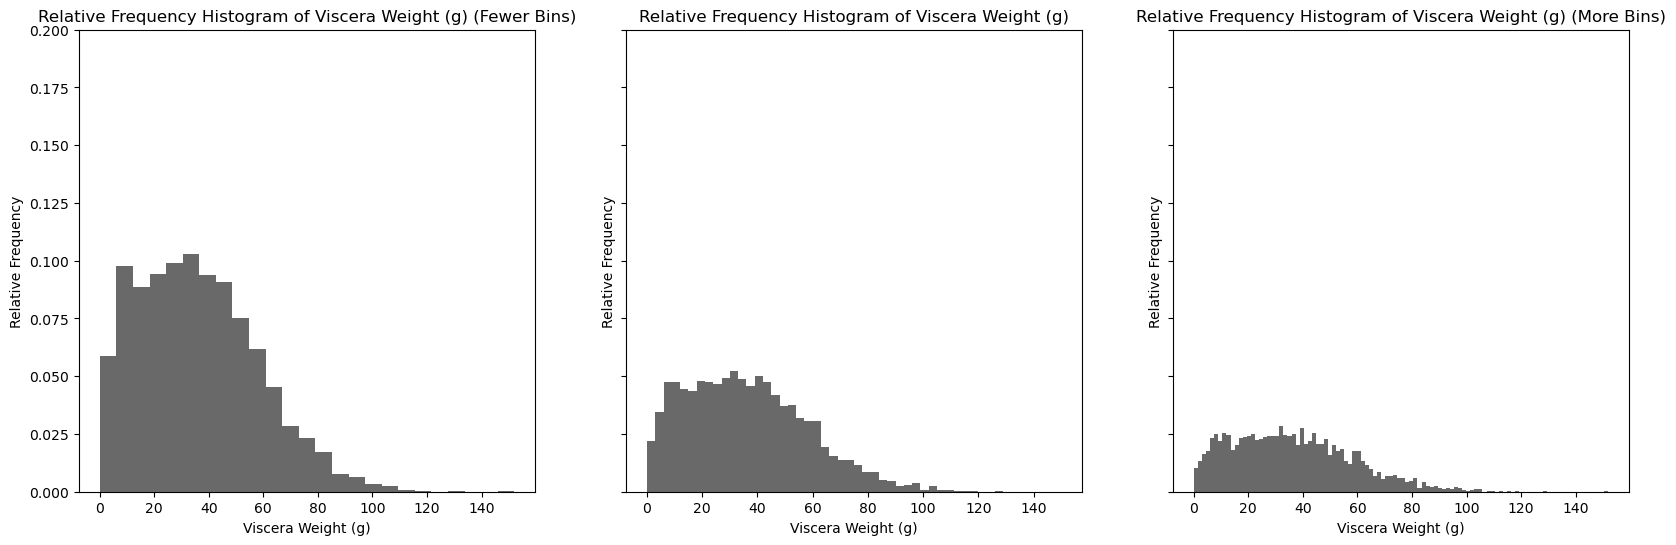

In [72]:
histogram_trio(df, 'Viscera Weight (g)', zoom=0.20)

Nothing too unusual to note. One thing to mention is there is a bit of a drop between about 0-5g to a large spike around 10g. The other weight variables showed this spike as well, though the reason for it is initially unclear.

### <a id="shell_weight">Shell Weight (g)</a> <br>
<a href='#step2'> ^ EDA </a>

Now we have Shell Weight in grams. Another numeric variable, this is the weight of the shell after drying. The Whole Weight, Shucked Weight, and Viscera Weight had similar distributions, so we might expect Shell Weight to follow suit. Here are the summary statistics:

In [73]:
df['Shell Weight (g)'].describe()

count    4177.000000
mean       47.766172
std        27.840534
min         0.300000
25%        26.000000
50%        46.800000
75%        65.800000
max       201.000000
Name: Shell Weight (g), dtype: float64

The mean is 47.8g, once again a large standard deviation of 27.8g. Median is slightly smaller at 46.8g, and again a large range between min of 0.3g and max of 201.0g. The 3rd quartile is 65.8g, so we expect a lot of extreme values on the high end again, but overall a symmetric distribution with a right skew.

Here is our histogram/boxplot:

Freeman Diaconis for Shell Weight (g): 51 bins


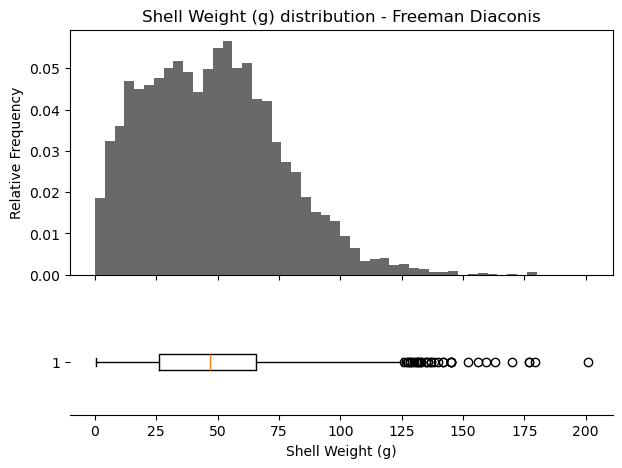

4

In [74]:
histogram_w_whiskers(df, 'Shell Weight (g)')

Pretty much what we expect by now - this distribution is very similar to the distributions we found for Whole Weight, Shucked Weight, and Viscera Weight, with lots of extreme values on the higher side of the distribution.

Now we have the trio histograms:

Freeman Diaconis for Shell Weight (g): 51 bins


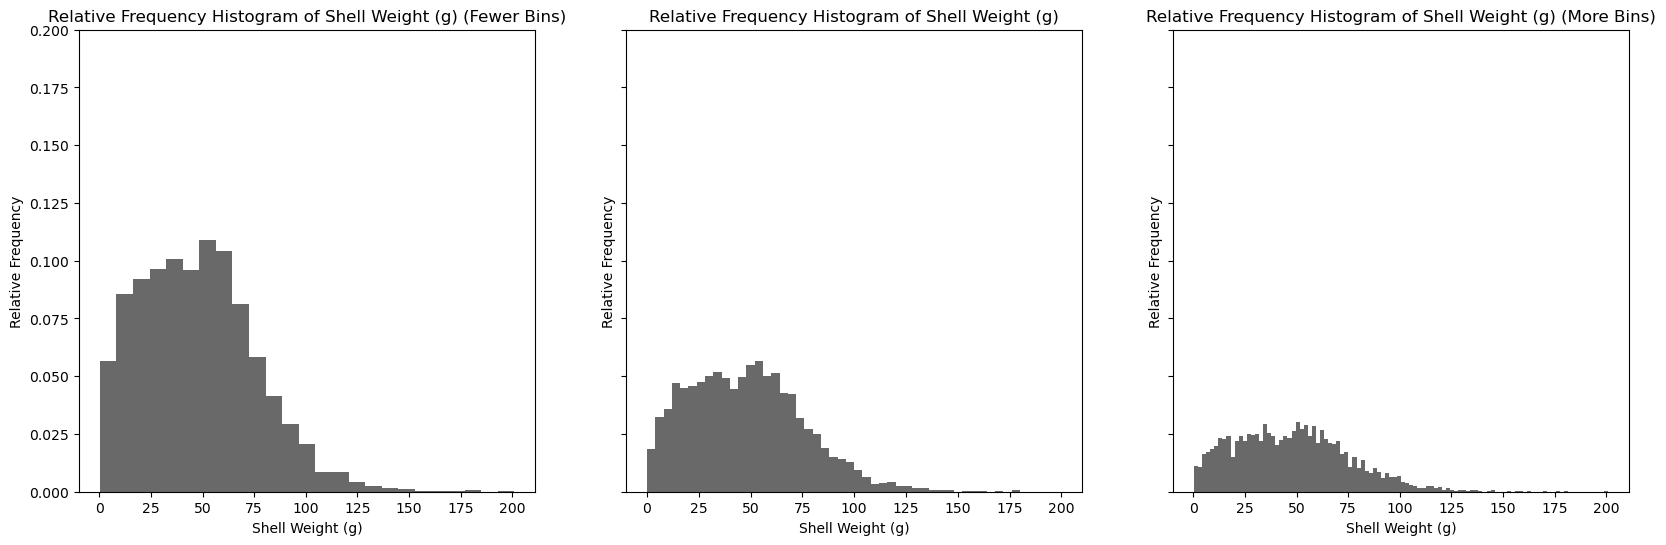

In [76]:
histogram_trio(df, 'Shell Weight (g)', zoom=0.20)

Nothing unsual about the histograms here. Again similar to what we've seen for the other weight variables. There is a slight dip around 40g-50g.

It is likely that older abalone are larger, and therefore contribute higher values to each weight variable the older an abalone gets.

### <a id="rings">Rings</a> <br>
<a href='#step2'> ^ EDA </a>

Finally we have Rings. This is a numeric variable, and is directly related to age. We would expect older abalone to have more rings than younger abalone. We start with summary statistics:

In [77]:
df['Rings'].describe()

count    4177.000000
mean        9.933684
std         3.224169
min         1.000000
25%         8.000000
50%         9.000000
75%        11.000000
max        29.000000
Name: Rings, dtype: float64

The min is 1 and the max 29. The mean of 9.9 is slightly higher than the median of 9 rings. While the 1st and 3rd quartiles are about equidistant from the median, we expect to see some large values since the 3rd quartile is only 11 vs the max of 29, as well as some small values since the min is 1. We expect a symmetric, right skewed histogram, similar to what we've seen with weight. Because the freeman-diaconis function returns a value of zero for this variable, we will view a simple histogram:

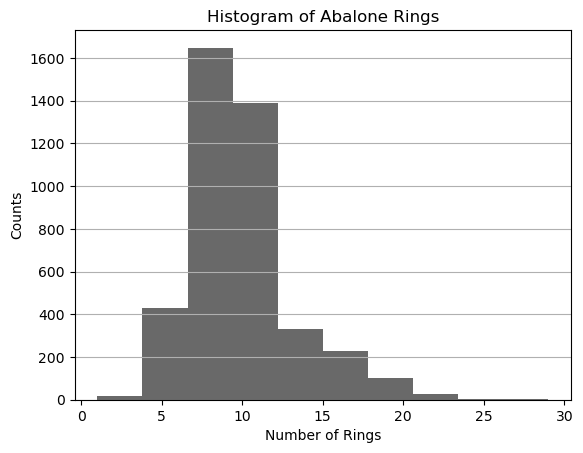

In [84]:
plt.hist(df['Rings'], color='dimgray')
plt.title('Histogram of Abalone Rings')
plt.xlabel('Number of Rings')
plt.ylabel('Counts')

plt.grid(axis='y')

plt.show()
plt.close()

About what we expected here. Most abalone fall within the interquartile range of 8-11. I don't think decreasing the number of bins will show anything, so let's try increasing bin size:

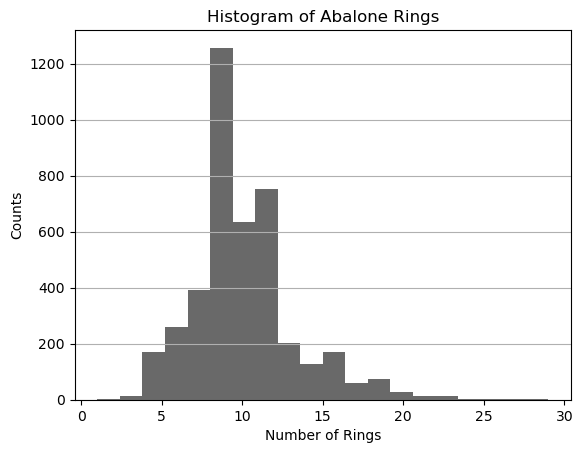

In [85]:
plt.hist(df['Rings'], color='dimgray', bins=20)
plt.title('Histogram of Abalone Rings')
plt.xlabel('Number of Rings')
plt.ylabel('Counts')

plt.grid(axis='y')
plt.show()
plt.close()

Nothing too unexpected. The largest portion is right around the mean/median, with a dip before about 8 rings and after about 11 rings. Age of an abalone can vary depending on its species, with the longest lived abalone up to 40 years. We could also plot age directly, but since it's a simple addition to rings, we would only see a shifted histogram.

We can look at a boxplot to visualize further:

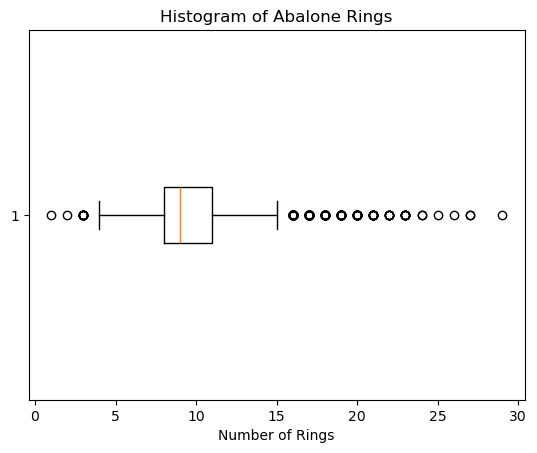

In [89]:
plt.boxplot(df['Rings'], vert=False)
plt.title('Boxplot of Abalone Rings')
plt.xlabel('Number of Rings')

plt.show()
plt.close()

This boxplot is consistent with what the histogram shows: a small interquartile range between 8-11, with a several values outside the 1.5x IQR. 

There seem to be a wide range of info about abalone lifespan online, but depending on the type of abalone, they could live up to about 40 years. A lot of factors go into growing abalone on farms, such as diet, biodiversity, and salinity of water. 

## Pairwise EDA with Target Variable (Rings)

### <a id="sex_rings">Sex vs Rings</a> <br>
<a href='#step2'> ^ EDA </a>

Now we turn to pairwise analysis of each variable with the target variable, Rings. We will start by comparing Sex against Rings.  Since we are comparing a categorical variable Sex against the Numeric Rings, we can consider the descriptive statistics for Rings for each of the 3 values of Sex. We expect that infants have a lower number of rings than males or females:

In [ ]:
by_sex = df.groupby('Sex')
rings_by_sex = by_sex['Rings'].describe()
rings_by_sex

We see that infants have a mean ring count of about 8, while females and males have about the same mean, 11. Infants also have a lower median at 8 compared with 10 for both females and males, and overall have lower values in their statistics than females or males. 

We can visualize the differences in the distributions of rings by sex by small multiples. Let's see how each sex compares:

[15  7 10 ... 10  9 12]
[ 9 20 16 ...  8 11 10]
[ 7  8  7 ...  7  7 10]


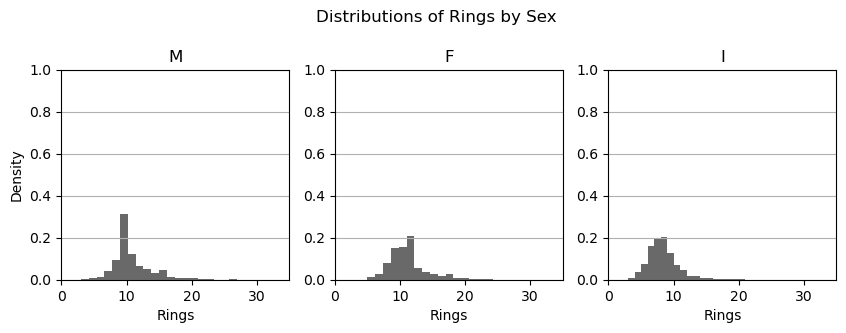

In [ ]:
labels = pd.unique(df['Sex'].values)

figure = plt.figure(figsize=(10,6))
figure.suptitle('Distributions of Rings by Sex')
for i, x in enumerate(labels):
    axes = figure.add_subplot(2, 3, i+1)
    subdata = by_sex['Rings'].get_group(x).values
    axes.hist(subdata, bins=20, color='dimgray', density=True)
    axes.set_title(x)
    axes.set_ylim((0, 1))
    axes.set_xlim((0, 35))
    axes.set_xlabel('Rings')
    axes.grid(axis='y')
    if (i % 3 == 0):
        axes.set_ylabel('Density')
        
plt.show()
plt.close()

We see fairly symmetric distribution in each case, with a large spike for males around 10 rings. Females have the highest proportion closer to 11-12 rings, while infants tend a bit lower around 9-10 rings. From our descriptive statistics, we saw the max value for females was the highest, at 29 rings, followed closely by males at 27 and infants at 21. It seems that on average, females live longer than males, and infants live shorter than males and females (hence why they are infants). 

According to the government of Western Australia, abalone have a high mortality rate as infants and larvae, but while fully mature abalone are not as in much danger to predators - this might help explain why infant abalone do not live as long and do not have as many rings as adults.

https://www.fish.wa.gov.au/Documents/recreational_fishing/fact_sheets/fact_sheet_abalone.pdf

### <a id="length_rings">Length (mm) vs Rings</a> <br>
<a href='#step2'> ^ EDA </a>

Next we can look at Length vs Rings. Since these are both numerical variables and we've already looked at the descriptive statistics individually, we can calculate the Pearson correlation coefficient and the Spearman correlation coefficient:

In [ ]:
print('r = ', stats.pearsonr(df['Length (mm)'], df['Rings'])[0])
print('rho = ', stats.spearmanr(df['Length (mm)'], df['Rings'])[0])

r =  0.556719576929618
rho =  0.6043853354046326


We do see a fairly strong correlation between Length and Rings. Our R value of 0.57 tells us how linearly related these two variables are, while our Rho of 0.60 tells us the degree of monotonicity between Length and Rings. We see a fairly strong positive correlation here, and so it would appear that as Length of an abalone increases, so does the number of Rings it has.

Now we can visualize this relationship with a scatter plot:

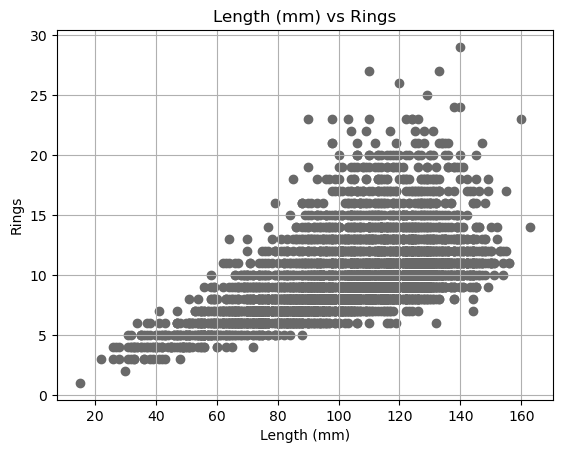

In [ ]:
plt.scatter(df['Length (mm)'], df['Rings'], color='dimgray')
plt.title('Length (mm) vs Rings')
plt.xlabel('Length (mm)')
plt.ylabel('Rings')

plt.grid(axis='x')
plt.grid(axis='y')

plt.show()
plt.close()

This plot is a bit hard to see since there are so many data points, but I think the main point comes across: longer abalone typically have more rings than shorter abalone. That is to say, the age of an abalone is affected by how long it is - it can be reasonably described as a relatively positive linear relationship.

### <a id="diameter_rings">Diameter (mm) vs Rings</a> <br>
<a href='#step2'> ^ EDA </a>

Now we move on to Diameter vs Rings. Since we know from our single variable EDA that Diameter seems to have a proportional relationship to Length, I predict we will again see that as Diameter increases, so do the number of Rings - they will be positively correlated and have a fairly strong correlation. Let's start with the Pearson's and Spearman's correlation coefficients:

In [ ]:
print('r = ', stats.pearsonr(df['Diameter (mm)'], df['Rings'])[0])
print('rho = ', stats.spearmanr(df['Diameter (mm)'], df['Rings'])[0])

r =  0.5746598513059193
rho =  0.6228950050921535


Similar to Length, we see that Diameter has a fairly strong correlation with Rings, with an R value of 0.57 and Rho of 0.62. Since both size parameters are related to each other (or so we assume), it makes sense that they have a similar relationship to Rings.

Let's try another scatter plot to get a good idea of the relationship:

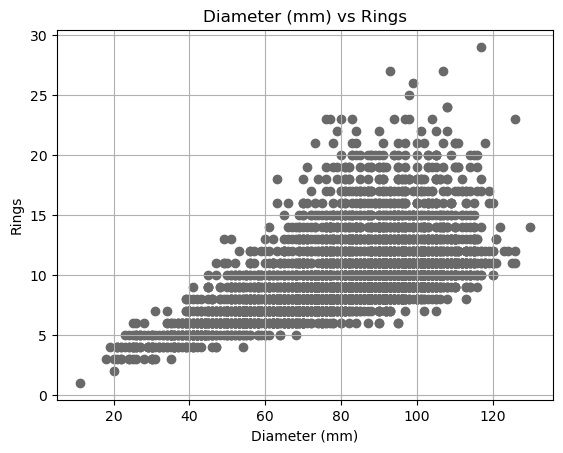

In [ ]:
plt.scatter(df['Diameter (mm)'], df['Rings'], color='dimgray')
plt.title('Diameter (mm) vs Rings')
plt.xlabel('Diameter (mm)')
plt.ylabel('Rings')

plt.grid(axis='x')
plt.grid(axis='y')

plt.show()
plt.close()

Again we see a similar plot as Length vs Rings. As Diameter increases, so too does Rings. We can surmise that older abalone are in general larger (and therefore have a larger diameter) than younger abalone. There doesn't seem to be a consensus online whether abalone stop growing after a certain age/point, and instead their growth may be more closely determined by other factors like food availability and temperature of their environments. However, I would think it interesting to look at the limits on whether there is a point their shells get too big to live in (similar to lobsters' shells).

### <a id="height_rings">Height (mm) vs Rings</a> <br>
<a href='#step2'> ^ EDA </a>

Next we turn our attention to Height vs Rings. Again this is a measurement of size, and so I think we will see the same pattern we've seen for Length and Diameter against Rings - a strong correlation between the two variables. Once again we look at the correlation coefficients:

In [ ]:
print('r = ', stats.pearsonr(df['Height (mm)'], df['Rings'])[0])
print('rho = ', stats.spearmanr(df['Height (mm)'], df['Rings'])[0])

r =  0.5574673244580376
rho =  0.6577163709860909


We see an R value of 0.56, and a Rho of 0.66, meaning again we have a strong correlation here, this time between Height and Rings. It would make sense that older abalone are not only longer than younger abalone, but are 'taller' too.

Again we will create a scatter plot, and should expect to see a familiar shape, as we've seen with the last 2 pairwise relationships:

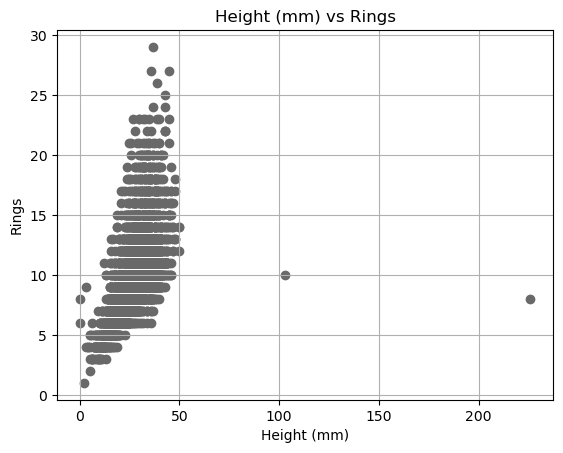

In [ ]:
plt.scatter(df['Height (mm)'], df['Rings'], color='dimgray')
plt.title('Height (mm) vs Rings')
plt.xlabel('Height (mm)')
plt.ylabel('Rings')

plt.grid(axis='x')
plt.grid(axis='y')

plt.show()
plt.close()

Remember from our single variable EDA that our median for Height was 28mm, and our 3rd quartile only 33mm. The oldest abalone generally fall into this range, while the extreme values for height are actually much closer to the mean/median for Rings (10 and 9, respectively). There is still a strong positive relationship despite this, as we can see that the abalone with Ring counts between 20-30 are still generally taller, around 40mm-50mm, than younger abalone.

Smaller abalone are probably easier to care for on farms, since they wouldn't need big tanks. The largest abalone here could be from the wild, where growing conditions are not controlled.

### <a id="whole_weight_rings">Whole Weight (g) vs Rings</a> <br>
<a href='#step2'> ^ EDA </a>

Next we turn to Whole Weight vs Rings. Again we have 2 numerical variables, so we can easily compare these variables to each other with correlation coefficients as well as a scatter plot. I hypothesize we will once again see a positive correlation here - because in general larger abalone should weight more, and thus have more Rings (as we've seen in our pairwise EDA so far).

In [ ]:
print('r = ', stats.pearsonr(df['Whole Weight (g)'], df['Rings'])[0])
print('rho = ', stats.spearmanr(df['Whole Weight (g)'], df['Rings'])[0])

r =  0.5403896769239007
rho =  0.6308319554663986


We do see that we have a fairly strong correlation between Whole Weight and Rings. It would be interesting to look at the relationships between weight and some of the size parameters, but we will focus on our target variable Rings for now. Let's see the scatter plot:

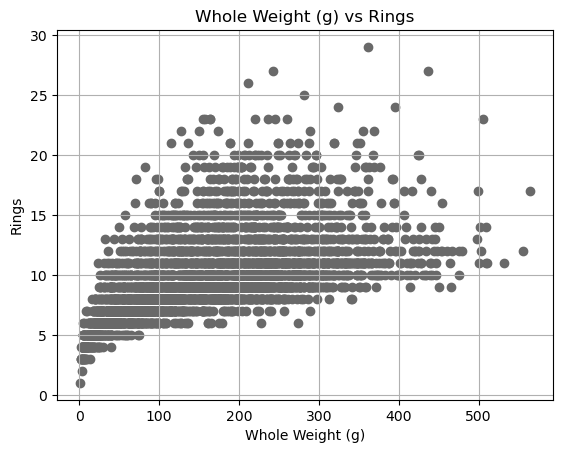

In [ ]:
plt.scatter(df['Whole Weight (g)'], df['Rings'], color='dimgray')
plt.title('Whole Weight (g) vs Rings')
plt.xlabel('Whole Weight (g)')
plt.ylabel('Rings')

plt.grid(axis='x')
plt.grid(axis='y')

plt.show()
plt.close()

We see a little more variability here than we do for say Diameter. Remember for Whole Weight, our min was 0.4g but the max was 565.1g. The heaviest abalone such as above 500g have an age closer to our 3rd quartile for Rings, 11. The oldest abalone still are heavy around 250g-450g, but similar to Diameter, the heaviest ones are not the oldest, as one might theorize before looking at the plot. 

Heavier abalone are likely older since they need time to grow. It seems intuitive that abalone (and a lot of animals) get bigger as they get older, since they become mature and need more food to survive.

### <a id="shucked_weight_rings">Shucked Weight (g) vs Rings</a> <br>
<a href='#step2'> ^ EDA </a>

We move on to Shucked Weight vs Rings. I think we will see the same pattern for most if not all of the weight variables - a strong positive correlationship. Here are the summary statistics:

In [ ]:
print('r = ', stats.pearsonr(df['Shucked Weight (g)'], df['Rings'])[0])
print('rho = ', stats.spearmanr(df['Shucked Weight (g)'], df['Rings'])[0])

r =  0.42088365794521454
rho =  0.5394199820834579


Shucked weight does not in fact have as much of a correlation to Rings as Whole Weight. Shucked weight is the weight of an abalone without its shell, so it could be that the Shell Weight makes up for an abalone's lower Shucked Weight when we consider its age. Again we will focus on the target variable, but I do wonder if Shucked Weight and Shell Weight have a high correlation with each other or not. Questions to explore in free time.

Here we have a simple scatter plot:

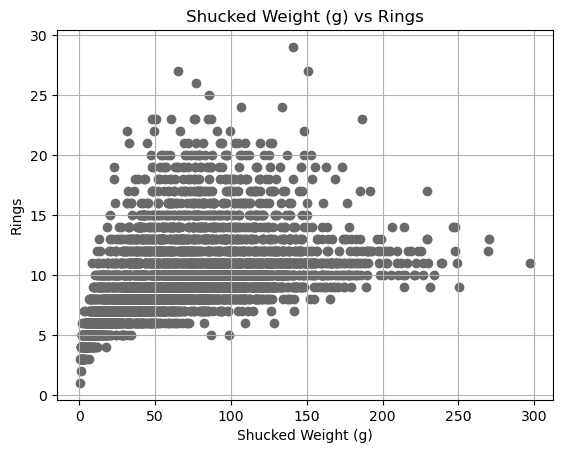

In [ ]:
plt.scatter(df['Shucked Weight (g)'], df['Rings'], color='dimgray')
plt.title('Shucked Weight (g) vs Rings')
plt.xlabel('Shucked Weight (g)')
plt.ylabel('Rings')

plt.grid(axis='x')
plt.grid(axis='y')

plt.show()
plt.close()

We see a fairly similar plot as in Whole Weight vs Rings, although some of the older abalone only have a Shucked Weight around 50g-100g. However, we do see the heaviest abalone by Shucked Weight have again between 10-15 Rings, close to the 3rd quartile for Rings. This leads me to believe there is an advantage in living longer the more an abalone weighs, but only up to a certain limit.

To note: Up until now, most of the scatter plots we've seen have had so many data points with similar values on the Y axis, we are left with a fairly noisy plot, which could make it more difficult to distinguish patterns in the data. We could add some jitter or perform other techniques to make the plots a bit easier to read, but I think for the purposes of this analysis, combined with viewing correlation coefficients, the normal scatter plots are enough to get an idea of the pairwise relationships we see.

### <a id="viscera_rings">Viscera Weight (g) vs Rings</a> <br>
<a href='#step2'> ^ EDA </a>

Next we will focus on Viscera Weight vs Rings. Again we can look at how Viscera Weight is correlated with Rings. I predict there will not be as much correlation here as we've seen with previous pairwise variables - Viscera Weight is not as varied as Shucked or Whole Weight.

In [ ]:
print('r = ', stats.pearsonr(df['Viscera Weight (g)'], df['Rings'])[0])
print('rho = ', stats.spearmanr(df['Viscera Weight (g)'], df['Rings'])[0])

r =  0.5038192487597715
rho =  0.6143438123140512


We see it does actually have a higher correlation to Rings than Shucked Weight. That must be some heavy viscera! It makes sense that abalone with more viscera are older, since they would have to be larger, and as we know, larger abalone tend to be older. We can confirm this with a scatter plot:

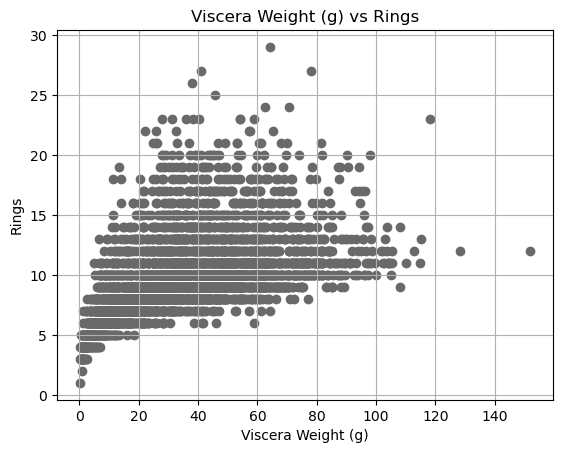

In [ ]:
plt.scatter(df['Viscera Weight (g)'], df['Rings'], color='dimgray')
plt.title('Viscera Weight (g) vs Rings')
plt.xlabel('Viscera Weight (g)')
plt.ylabel('Rings')

plt.grid(axis='x')
plt.grid(axis='y')

plt.show()
plt.close()

Similar to what we've seen with the other weight categories, there isn't too much else to add here - the abalone with the heaviest viscera tend towards the 3rd quartile. We could consider looking at a boxplot as well, but I will try to keep the notebook short, for the sake of time. 

Whole Weight so far has the highest correlation to Rings. Whole Weight may be more consistent of a measurement than Viscera Weight, which involves a dry measurement after bleeding the gut.

### <a id="shell_weight_rings">Shell Weight (g) vs Rings</a> <br>
<a href='#step2'> ^ EDA </a>

Finally we have Shell Weight vs Rings. Since we already looked at Shucked Weight and saw a strong positive correlation to Rings, we would expect Shell Weight to look very similar. After all, larger abalone shucks should proportionally have a similar sized shell no? Here are the correlation coefficients:

In [ ]:
print('r = ', stats.pearsonr(df['Shell Weight (g)'], df['Rings'])[0])
print('rho = ', stats.spearmanr(df['Shell Weight (g)'], df['Rings'])[0])

r =  0.6275740445103217
rho =  0.6924745607793563


We see a relatively very strong correlationship, when compared to some of the other categories we've seen so far, with a pearson r of 0.63 and a spearman r of about 0.69. This makes sense when we think that as abalone age, they continue to grow, and thus their shells grow with them. We can look at one last scatter plot as well:

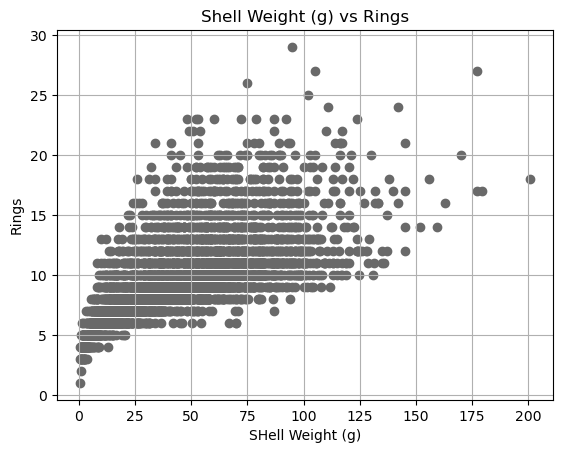

In [ ]:
plt.scatter(df['Shell Weight (g)'], df['Rings'], color='dimgray')
plt.title('Shell Weight (g) vs Rings')
plt.xlabel('SHell Weight (g)')
plt.ylabel('Rings')

plt.grid(axis='x')
plt.grid(axis='y')

plt.show()
plt.close()

Unlike the other weight variables, we see the heaviest abalone shell has a bit more Rings than just toward the 3rd quartile - closer to 17 in fact. We see that some of the heaviest shelled abalone do have a lot of Rings - 15+. 

Rings are determined by the shell, and shell weight is also dependent on the shell. We might want to explore this relationship further.

$Summary$

Since we saw a large correlation with Shell Weight to Rings, we might want to divide the Shell Weight by sex. Remember for Sex vs Rings, we saw females have slightly higher ring counts than males, and males slightly higher than infants. We can look at see if females also typically have heavier shells.

In [59]:
colors = df['Sex'].apply(lambda x: "DodgerBlue" if x == "M" else ("Tomato" if x == 'F' else 'Seagreen'))

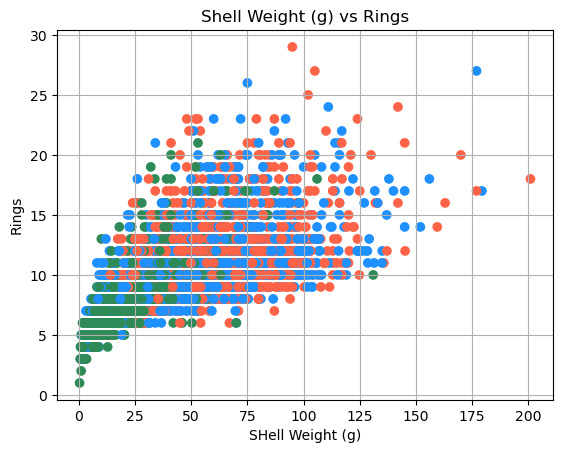

In [60]:
plt.scatter(df['Shell Weight (g)'], df['Rings'], color=colors)
plt.title('Shell Weight (g) vs Rings')
plt.xlabel('SHell Weight (g)')
plt.ylabel('Rings')

plt.grid(axis='x')
plt.grid(axis='y')

plt.show()
plt.close()

Again a bit difficult to see becaues we have so many points, but there is actually a relatively even mix between males (blue) and females (red), though more of the extreme values for weight tend to be females. And as we'd expect infants are closer to the low side of the distribution.

Although Shell Weight might be a good predictor for age, it seems that Sex is not. It would be difficult to separate the amount of rings an abalone has by sex.

We can next try to explore whether Shell Weight and Length are related, as it seems both are contributing factors towards Rings. Let's try a simple scatter plot:

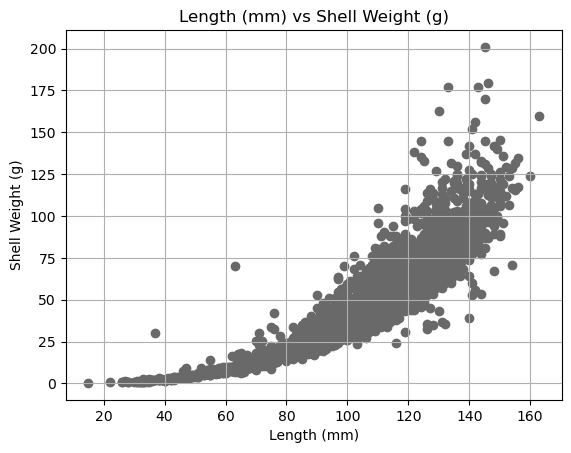

In [61]:
plt.scatter(df['Length (mm)'], df['Shell Weight (g)'], color='dimgray')
plt.title('Length (mm) vs Shell Weight (g)')
plt.xlabel('Length (mm)')
plt.ylabel('Shell Weight (g)')

plt.grid(axis='x')
plt.grid(axis='y')

plt.show()
plt.close()

We see a strong relationship here that looks exponential. As we suspected abalone that are longer are thus larger, tend to have bigger shells, and thus their shells will weigh more. Although we will not go through every single pairwise relationship, it's important to note that the size parameters such as Length, Diameter, and Height will likely show similar scatterplots when paired with the weight parameters, as we've already seen. Length and Shell Weight could be good predictors for Rings/age of an abalone.

We could try breaking down this plot further by amount of Rings. Let's look at the scatter plot with categories of Rings: 15+, 7-14, and 0-6.

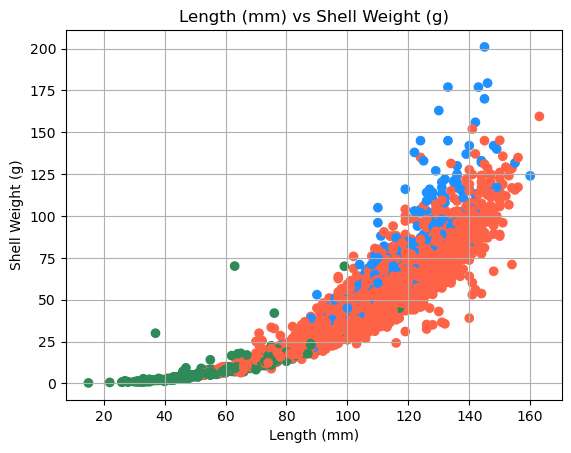

In [64]:
colors = df['Rings'].apply(lambda x: "DodgerBlue" if x >= 15  else ("Tomato" if x >= 7 else 'Seagreen'))

plt.scatter(df['Length (mm)'], df['Shell Weight (g)'], color=colors)
plt.title('Length (mm) vs Shell Weight (g)')
plt.xlabel('Length (mm)')
plt.ylabel('Shell Weight (g)')

plt.grid(axis='x')
plt.grid(axis='y')

plt.show()
plt.close()

We do start to see some interesting patterns. For abalone with 15 or more rings (blue), they tend to be longer and weight more. For abalone with 7-14 rings (red), we see most of the distribution here, which makes sense given our IQR of 8-11 rings. These abalone do not weigh as much nor are as long as the abalone with more rings. Finally we see abalone with 6 or fewer rings weigh the least and are the shortest.

Although we do see some areas where there are mixed catergories for rings, one could imagine a line being drawn in order to separate each ring category, and it could seem to encompass a fairly clean separation. I would say that length and shell weight could be good predictors for rings/age.

## 3 <a id="step3">Statistical and Mathematical Modeling of the Target Variable</a>
<a href="#contents">^ Contents</a>

---

**PRE-SUBMISSION CHECK LIST**

Before you submit this assignent, go back and review the directions to ensure that you have followed each instruction.

* [ ] Have you completed every section and answered every question asked?
* [ ] For every question, have you described your approach and explained your results?
* [ ] Have you checked for spelling and grammar errors?
* [ ] Are your code blocks free of any errors?
* [ ] Have you deleted unused code or markdown blocks? Removed scratch calculations? Excessive raw data print outs?
* [ ] Hide all the code/output cells and make sure that you have sufficient discussion. Re-show the output cells but leave code cells hidden.
* [ ] Have you *SAVED* your notebook?
* [ ] Are you following the submission requirements for this particular assignment?